In [1]:
# 6회 - 학생활동 데이터 기반 기말고사 성적 예측 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
# 문제01
from sklearn.neighbors import KNeighborsRegressor

In [35]:
# 문제02
student_df = pd.read_csv("data/6_student_final_grades.csv")
student_df.isnull().sum()

weekly_study_hours       0
attendance_rate          0
tutoring                 0
major                    0
midterm_score           40
avg_assignment_score     0
online_courses           0
club_activity           44
final_exam_score         0
dtype: int64

<Axes: xlabel='midterm_score', ylabel='final_exam_score'>

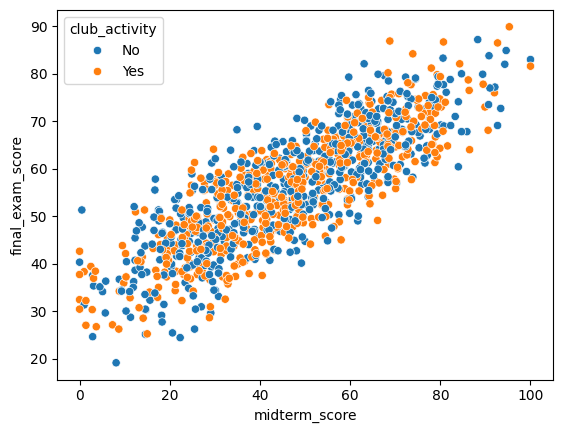

In [36]:
# 문제03
sns.scatterplot(data=student_df, x='midterm_score', y='final_exam_score', hue='club_activity')

<Axes: xlabel='final_exam_score', ylabel='Density'>

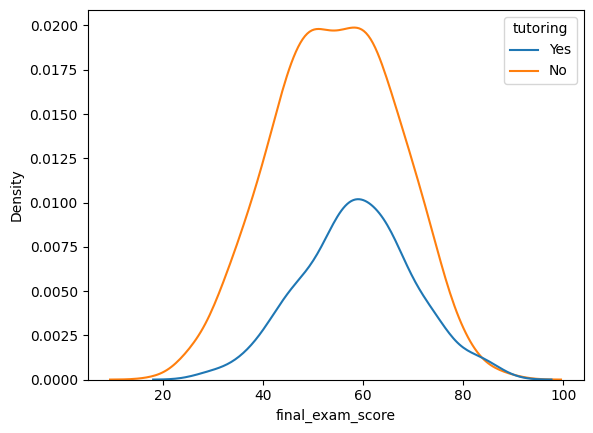

In [37]:
# 문제04
sns.kdeplot(data=student_df, x='final_exam_score', hue='tutoring')

In [38]:
# 문제05
student_df.groupby(['major'])[['weekly_study_hours','avg_assignment_score']].mean()

,weekly_study_hours,avg_assignment_score
major,,
공학,21.169421,78.644628
사회,21.393162,80.333333
예체능,21.609091,78.990909
인문,21.166667,78.503546
자연,21.022523,80.130631


In [39]:
# 문제06
student_pre = student_df.copy()

midterm_score_mean = student_pre['midterm_score'].mean()
student_pre['midterm_score'].fillna(midterm_score_mean, inplace=True)
student_pre.dropna(subset=['club_activity'], inplace=True) # 오답
student_pre.isnull().sum()

weekly_study_hours      0
attendance_rate         0
tutoring                0
major                   0
midterm_score           0
avg_assignment_score    0
online_courses          0
club_activity           0
final_exam_score        0
dtype: int64

In [40]:
# 문제07
student_pre.head()

,weekly_study_hours,attendance_rate,tutoring,major,midterm_score,avg_assignment_score,online_courses,club_activity,final_exam_score
0,10.0,55.0,Yes,인문,11.3,63.0,31.0,No,28.7
1,29.0,51.0,Yes,공학,46.2,75.0,46.0,No,56.3
2,22.0,93.0,Yes,사회,52.4,90.0,9.0,Yes,64.0
3,37.0,97.0,No,자연,64.8,77.0,38.0,Yes,66.0
4,31.0,94.0,No,공학,54.1,68.0,41.0,No,56.7


In [43]:
student_pre['tutoring'] = student_pre['tutoring'].replace({'Yes':0,'No':1})
student_pre['club_activity'] = student_pre['club_activity'].replace({'Yes':0,'No':1})
student_pre.head() # 오답


,weekly_study_hours,attendance_rate,tutoring,major,midterm_score,avg_assignment_score,online_courses,club_activity,final_exam_score
0,10.0,55.0,0,인문,11.3,63.0,31.0,1,28.7
1,29.0,51.0,0,공학,46.2,75.0,46.0,1,56.3
2,22.0,93.0,0,사회,52.4,90.0,9.0,0,64.0
3,37.0,97.0,1,자연,64.8,77.0,38.0,0,66.0
4,31.0,94.0,1,공학,54.1,68.0,41.0,1,56.7


In [53]:
# 문제08
student_encoded = pd.get_dummies(student_pre, columns=['major'])

X = student_encoded.drop(['final_exam_score'], axis=1)
y = student_encoded['final_exam_score']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_valid.shape)
print(y_train.shape, y_valid.shape)

(924, 12) (232, 12)
(924,) (232,)


In [54]:
# 문제09 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [55]:
# 문제10
from sklearn.neighbors import KNeighborsRegressor # 문제1에서 임포트
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [56]:
# 문제11
from sklearn.ensemble import RandomForestRegressor 
model_rf = RandomForestRegressor(n_estimators=100, max_features=5, random_state=42)
model_rf.fit(X_train_scaled, y_train)


RandomForestRegressor(max_features=5, random_state=42)

In [59]:
importances = model_rf.feature_importances_
feature_names = X.columns
most_important_idx = np.argmax(importances)
most_important_feature = feature_names[most_important_idx]

답안11 = most_important_feature
most_important_feature

'midterm_score'

In [ ]:
# 문제12
from sklearn.metrics import mean_squared_error, r2_score

knn_pred = model_knn.predict(X_valid_scaled) # predict 까먹지말자
knn_mse = mean_squared_error(knn_pred, y_valid)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(knn_pred, y_valid)

print(f"knn_rmse : {knn_rmse:.4f}")
print(f"knn_r2 : {knn_r2:.4f}")
print("="*50)

rf_pred = model_rf.predict(X_valid_scaled)
rf_mse = mean_squared_error(rf_pred, y_valid)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(rf_pred, y_valid)

print(f"rf_rmse : {rf_rmse:.4f}")
print(f"rf_r2 : {rf_r2:.4f}")
print("="*50)

knn_rmse : 7.1661
knn_r2 : 0.3553
rf_rmse : 6.0281
rf_r2 : 0.6523


In [70]:
X_train_scaled.shape[1]

12

In [ ]:
# 문제13
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dense(32, activation='relu'),
    Dense(1)
])

model_dl.compile(optimizer='adam', loss='mean_squared_error')

history = model_dl.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_valid_scaled, y_valid)
)

model_dl.evaluate(X_valid_scaled, y_valid)

In [78]:
# 문제14 
new_student_data = np.array([[20, 95, 1, 85.0, 90.0, 30, 1, 0, 1, 0, 0, 0]])
new_student_data_scaled = scaler.transform(new_student_data)
predicted_grade_dl = model_dl.predict(new_student_data_scaled)
predicted_grade_dl[0][0]

1/1 [==============================] - 0s 32ms/step


/opt/anaconda3/envs/aice/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


76.61317

In [79]:
# 문제 6,7,11,13 다시풀기

In [80]:
student_pre = student_df.copy()

In [82]:
student_pre.isnull().sum()

weekly_study_hours       0
attendance_rate          0
tutoring                 0
major                    0
midterm_score           40
avg_assignment_score     0
online_courses           0
club_activity           44
final_exam_score         0
dtype: int64

In [88]:
midterm_score_mean = student_pre['midterm_score'].mean()
student_pre['midterm_score'].fillna(midterm_score_mean, inplace=True)
student_pre.isnull().sum()

weekly_study_hours       0
attendance_rate          0
tutoring                 0
major                    0
midterm_score            0
avg_assignment_score     0
online_courses           0
club_activity           44
final_exam_score         0
dtype: int64

In [90]:
student_pre.dropna(subset=['club_activity'], inplace=True)
student_pre.isnull().sum()

weekly_study_hours      0
attendance_rate         0
tutoring                0
major                   0
midterm_score           0
avg_assignment_score    0
online_courses          0
club_activity           0
final_exam_score        0
dtype: int64

In [91]:
student_pre.head()

,weekly_study_hours,attendance_rate,tutoring,major,midterm_score,avg_assignment_score,online_courses,club_activity,final_exam_score
0,10.0,55.0,Yes,인문,11.3,63.0,31.0,No,28.7
1,29.0,51.0,Yes,공학,46.2,75.0,46.0,No,56.3
2,22.0,93.0,Yes,사회,52.4,90.0,9.0,Yes,64.0
3,37.0,97.0,No,자연,64.8,77.0,38.0,Yes,66.0
4,31.0,94.0,No,공학,54.1,68.0,41.0,No,56.7


In [93]:
student_pre['tutoring'] = student_pre['tutoring'].replace({'Yes':1,'No':0})
student_pre.head()

,weekly_study_hours,attendance_rate,tutoring,major,midterm_score,avg_assignment_score,online_courses,club_activity,final_exam_score
0,10.0,55.0,1,인문,11.3,63.0,31.0,No,28.7
1,29.0,51.0,1,공학,46.2,75.0,46.0,No,56.3
2,22.0,93.0,1,사회,52.4,90.0,9.0,Yes,64.0
3,37.0,97.0,0,자연,64.8,77.0,38.0,Yes,66.0
4,31.0,94.0,0,공학,54.1,68.0,41.0,No,56.7


In [94]:
student_pre['club_activity'] = student_pre['club_activity'].replace({'Yes':1,'No':0})
student_pre.head()

,weekly_study_hours,attendance_rate,tutoring,major,midterm_score,avg_assignment_score,online_courses,club_activity,final_exam_score
0,10.0,55.0,1,인문,11.3,63.0,31.0,0,28.7
1,29.0,51.0,1,공학,46.2,75.0,46.0,0,56.3
2,22.0,93.0,1,사회,52.4,90.0,9.0,1,64.0
3,37.0,97.0,0,자연,64.8,77.0,38.0,1,66.0
4,31.0,94.0,0,공학,54.1,68.0,41.0,0,56.7


In [ ]:
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dense(32, activation='relu'),
    Dense(1)
])

model_dl.compile(optimizer='adam', loss='mean_squared_error')

history = model_dl.fit(
    X_train_scaled, y_train,
    epochs = 100,
    batch_size=32,
    validation_data=(X_valid_scaled, y_valid),
    verbose=0
)

model_dl.evaluate(X_valid_scaled, y_train)